# Bike Sharing Demand Prediction Analysis

This project involves analyzing a Bike Sharing dataset to predict bike rental counts based on environmental and seasonal settings. The analysis covers data exploration, visualization, preprocessing, and implementing multiple regression models for prediction. Lastly, the most effective model is evaluated with feature importance analysis.


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading and Initial Inspection

Loading the Bike Sharing dataset to gain a basic understanding of its structure and key statistics.


In [ ]:
# Load Dataset
# Loading the dataset and inspecting the first few rows for an initial look
df = pd.read_csv('Bike share(Hour).csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.drop(columns=['instant','yr','dteday'], inplace= True)

In [ ]:
# Checking dataset information, summary statistics, and unique values for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   mnth        17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


In [25]:
df.describe()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [26]:
df.nunique()

season          4
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
casual        322
registered    776
cnt           869
dtype: int64

## Exploratory Data Analysis (EDA)

### Visualizing Target Variable
Creating visualizations to explore the distribution of the target variable (`count`) and identifying relationships between other features and bike rental count.


Text(0, 0.5, 'count')

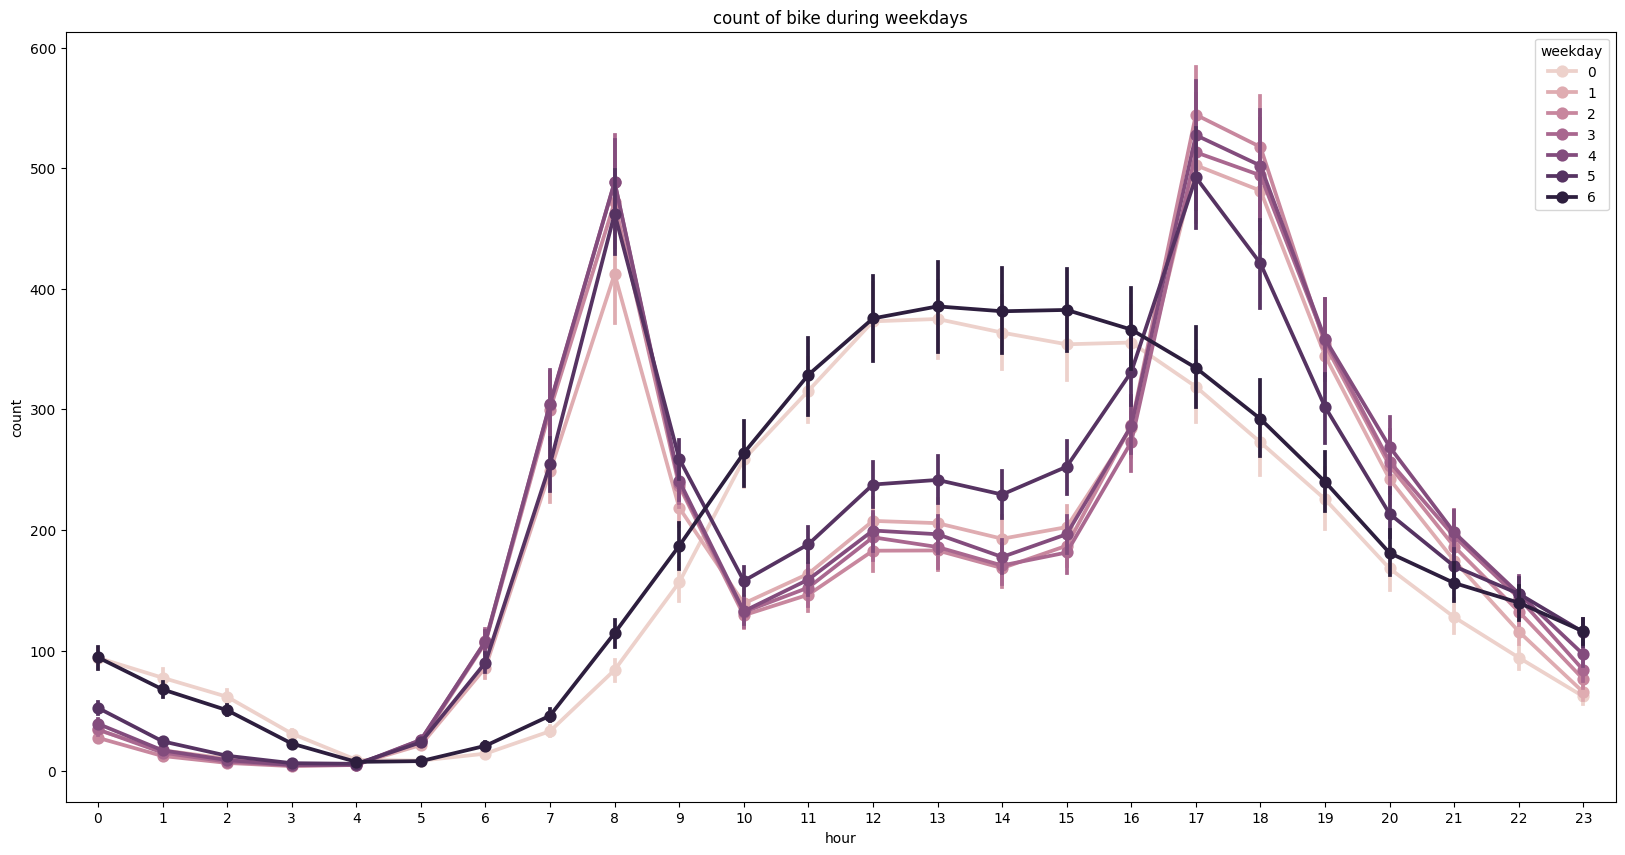

In [ ]:
# Target Variable Distribution
# Visualizing the distribution of bike rentals (target variable: count) over different hours and days
plt.figure(figsize=(20,10))
plt.title('count of bike during weekdays')
sns.pointplot(data=df, x='hr', y='cnt', hue='weekday')
plt.xlabel('hour')
plt.ylabel('count')

Text(0, 0.5, 'count')

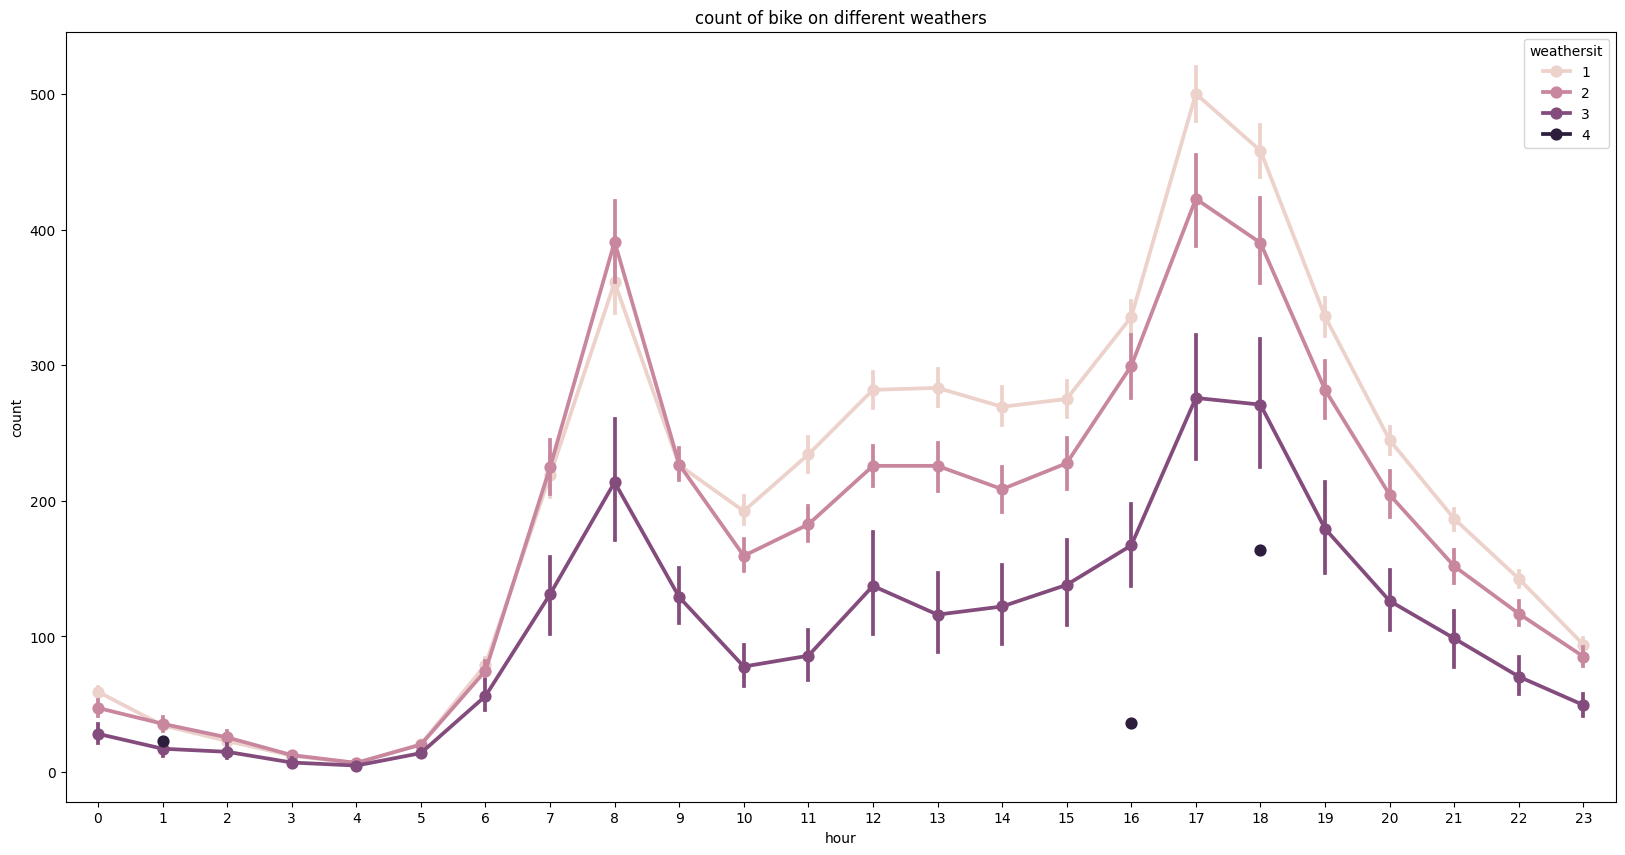

In [28]:
plt.figure(figsize=(20,10))
plt.title('count of bike on different weathers')
sns.pointplot(data=df, x='hr', y='cnt', hue='weathersit')
plt.xlabel('hour')
plt.ylabel('count')

Text(0, 0.5, 'count')

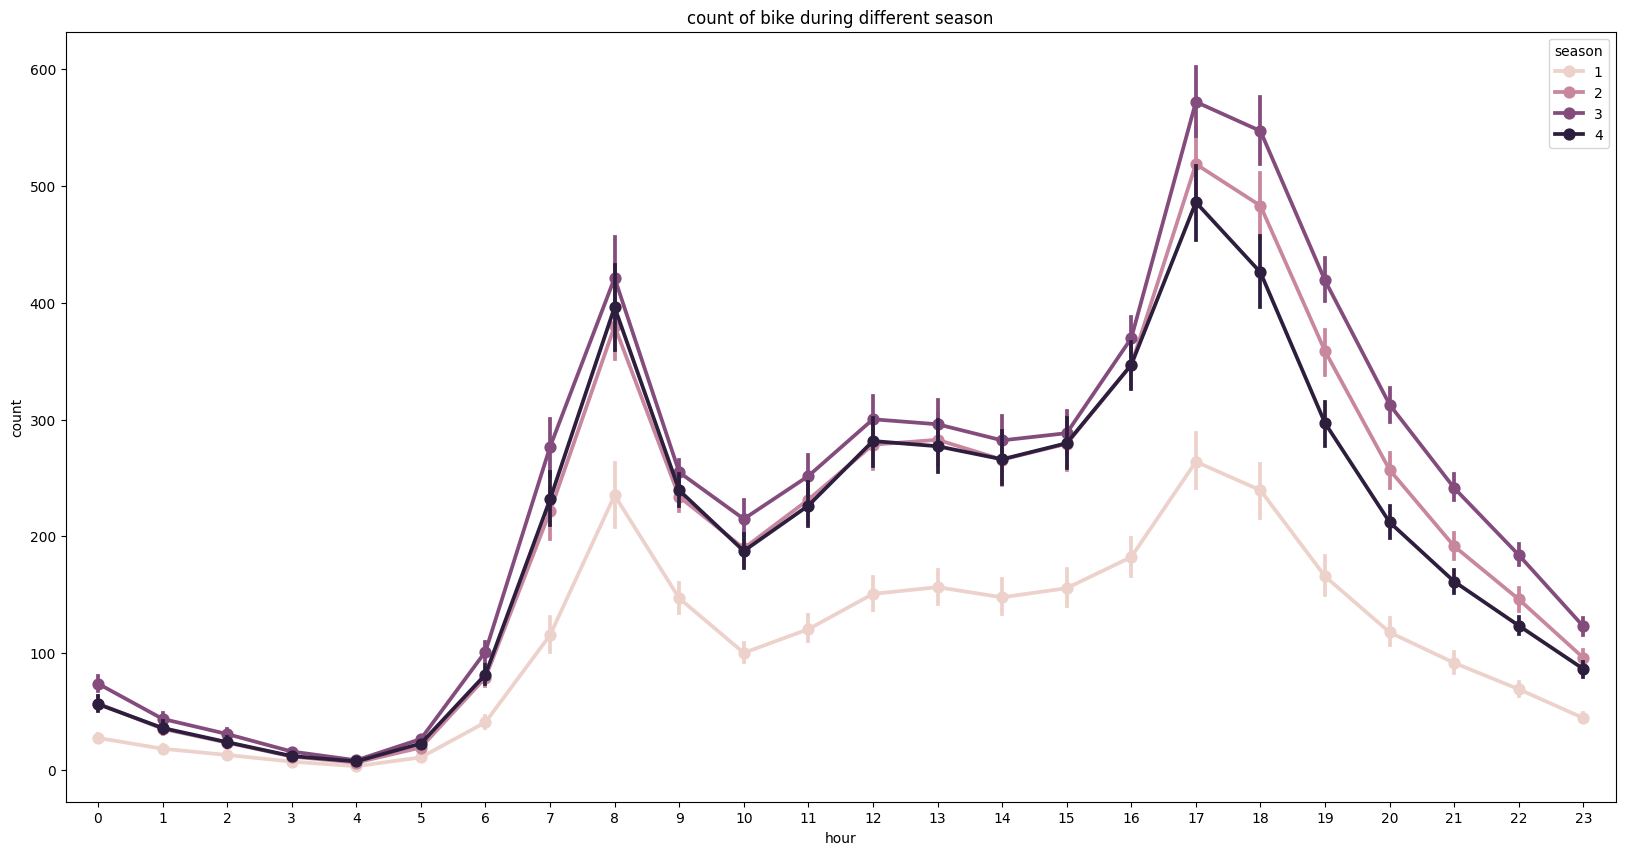

In [29]:
plt.figure(figsize=(20,10))
plt.title('count of bike during different season')
sns.pointplot(data=df, x='hr', y='cnt', hue='season')
plt.xlabel('hour')
plt.ylabel('count')

Text(0, 0.5, 'count')

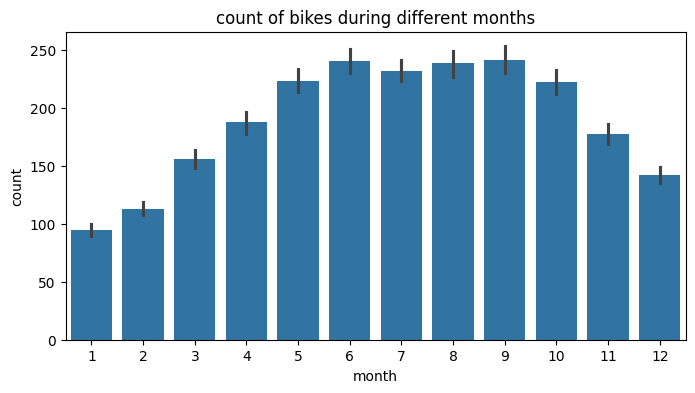

In [30]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='mnth', y='cnt')
plt.title('count of bikes during different months')
plt.xlabel('month')
plt.ylabel('count')

Text(0, 0.5, 'count')

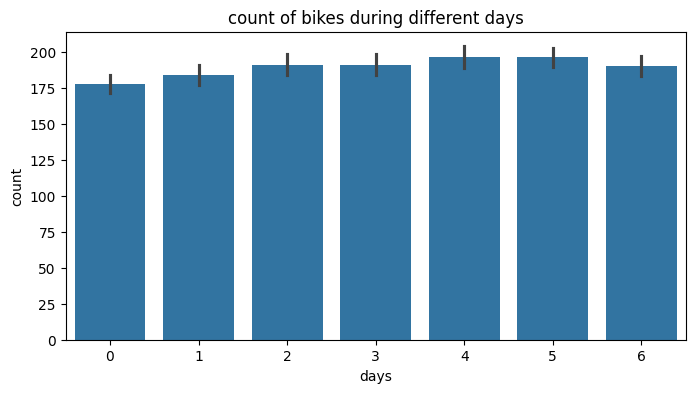

In [31]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='weekday', y='cnt')
plt.title('count of bikes during different days')
plt.xlabel('days')
plt.ylabel('count')

### Correlation Analysis

Examining correlations between features to identify important relationships and multicollinearity.


<Axes: >

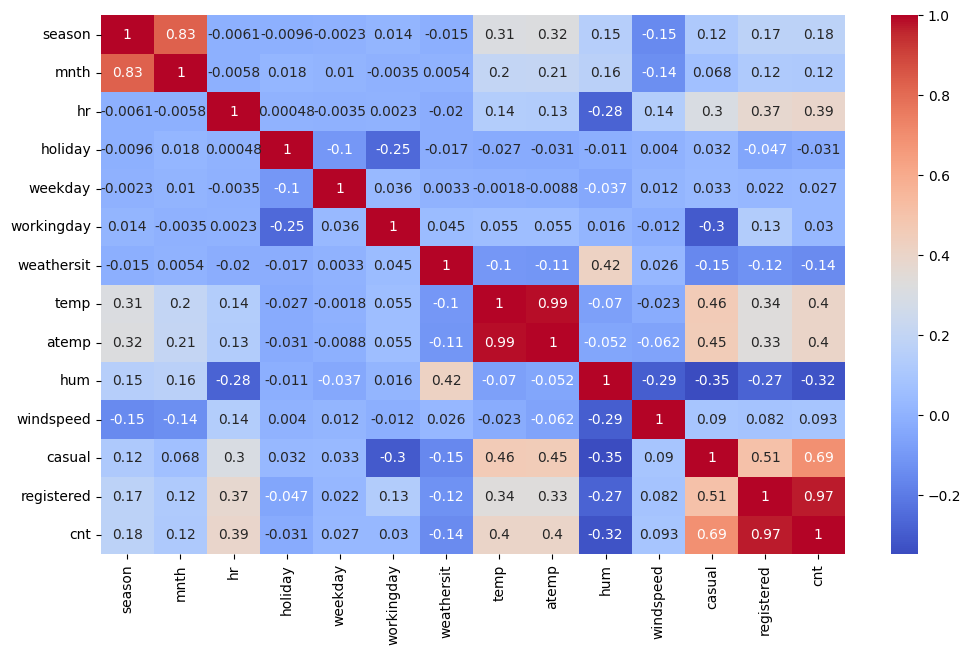

In [32]:
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Data Preprocessing

Dropping unnecessary columns, encoding categorical variables, and splitting the data for model training.


In [33]:
df.drop(columns=['hum','atemp','windspeed','holiday','casual'], inplace=True)

In [34]:
df.nunique()

season          4
mnth           12
hr             24
weekday         7
workingday      2
weathersit      4
temp           50
registered    776
cnt           869
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ['weekday', 'mnth']

for col in cols:
    df[col] = le.fit_transform(df[col])
    
df_encod = pd.get_dummies(data=df['season'], prefix='season', drop_first=True)
df = pd.concat([df, df_encod],axis=1)

In [36]:
X = df.drop(columns=['cnt'])
y = df['cnt']

## Model Training and Evaluation

Creating a function to train, scale, predict, and evaluate models, using a loop to try various regression models and compare performance.


In [ ]:
# Define Model Training Function
# Function to train, scale, predict, and evaluate models with MSE and cross-validation score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    cv_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('MODEL:', model)
    print('CV SCORE:', cv_score)
    print('MSE:', mean_squared_error(y_test, pred))
    print('\n')
    return X_train, y_test, pred

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# List of models to be trained and evaluated
models = [LinearRegression(),Lasso(),Ridge(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),GradientBoostingRegressor()]

In [ ]:
# Looping through each model
for model in models:
    X_train, y_test, pred = train(model, X, y)

MODEL: LinearRegression()
CV SCORE: 1168.1641190129824
MSE: 1181.139495640494


MODEL: Lasso()
CV SCORE: 1228.5078413695023
MSE: 1231.06723343076


MODEL: Ridge()
CV SCORE: 1168.1742468571265
MSE: 1180.972107931985


MODEL: DecisionTreeRegressor()
CV SCORE: 587.7514646351799
MSE: 607.1457997698504


MODEL: RandomForestRegressor()
CV SCORE: 310.95574770831365
MSE: 315.92165605469967


MODEL: ExtraTreesRegressor()
CV SCORE: 295.4946594218382
MSE: 301.0909473705409


MODEL: GradientBoostingRegressor()
CV SCORE: 365.1743806223191
MSE: 382.25096910340227




In [69]:
Et = ExtraTreesRegressor()
X_train, y_test, pred = train(Et, X, y)

importances = model.feature_importances_

feature_importances = pd.DataFrame(importances, index= X_train.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=True)

print(feature_importances)


MODEL: ExtraTreesRegressor()
CV SCORE: 297.88709534726075
MSE: 299.122987589183


              Importance
season_4    0.000000e+00
season_3    8.891499e-07
season      8.992570e-06
weathersit  1.808918e-04
season_2    2.091805e-04
mnth        4.042669e-04
weekday     8.186796e-04
hr          5.931563e-03
temp        8.023074e-03
workingday  1.962178e-02
registered  9.648007e-01


### Feature Importance Analysis

Using the best model, `ExtraTreesRegressor`, to analyze feature importance and identify the most influential features in predicting bike rental counts.


Text(0, 0.5, 'Features')

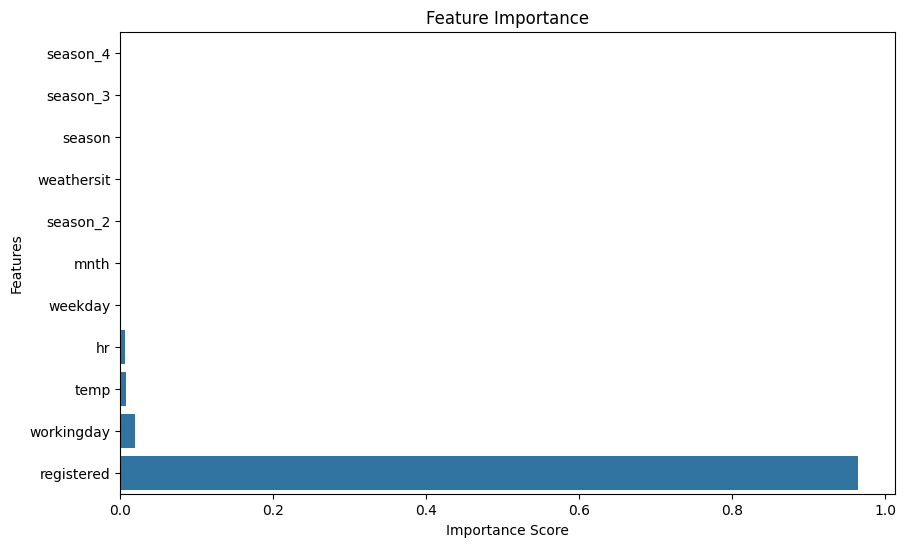

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')

## Conclusion

This analysis used various regression models to predict bike-sharing demand. Through cross-validation, we identified that the ExtraTreesRegressor provided the best performance, achieving the lowest error rate. This model's feature importance plot revealed the most impactful features, giving insights into factors that influence bike rental demand. This project can help refine future demand prediction strategies.
